In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.wcs import WCS
import scipy.ndimage as ndimage
import naima
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm

from ClusterModel import model
from ClusterTools import map_tools
from ClusterTools import cluster_profile
from ClusterTools import cluster_spectra
from ClusterTools import cluster_global
from ClusterTools import cluster_xspec

dat_dir = os.getenv('CTAPHYS_EDAT_DIR')

# Development of X-ray observables

In [2]:
cluster = model.Cluster(silent=False)
cluster.coord = SkyCoord(0.0*u.deg, -20.0*u.deg, frame='galactic')

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
Setting coord value


# Test impact of metalicity

True


/Users/adam/anaconda2/envs/cta/lib/python2.7/site-packages/naima/radiative.py:1564: UserWarning: LUT PionDecayKafexhiu14_LUT_Pythia8.npz not found, reverting to useLUT = False
  LUT_fname


False


Text(0.5,0,'energy (GeV)')

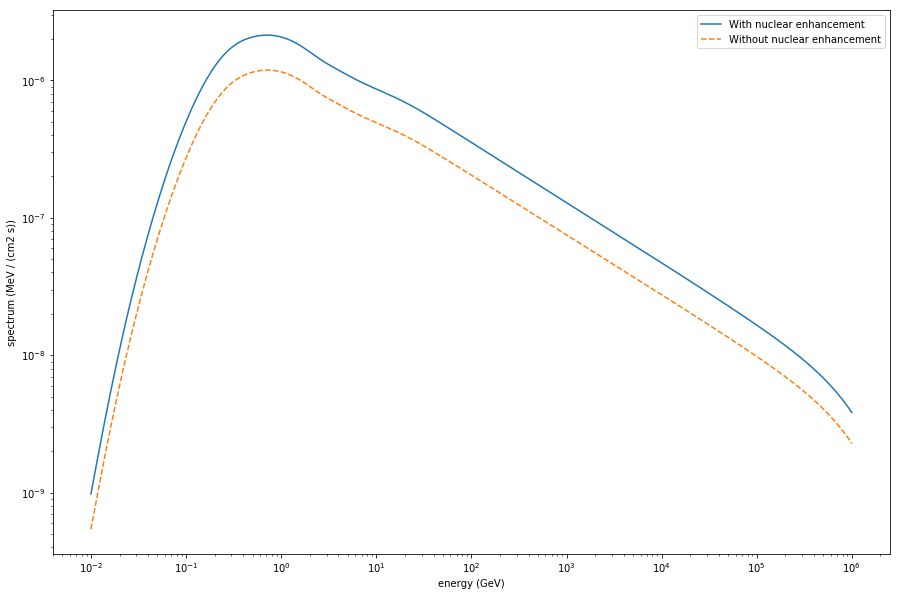

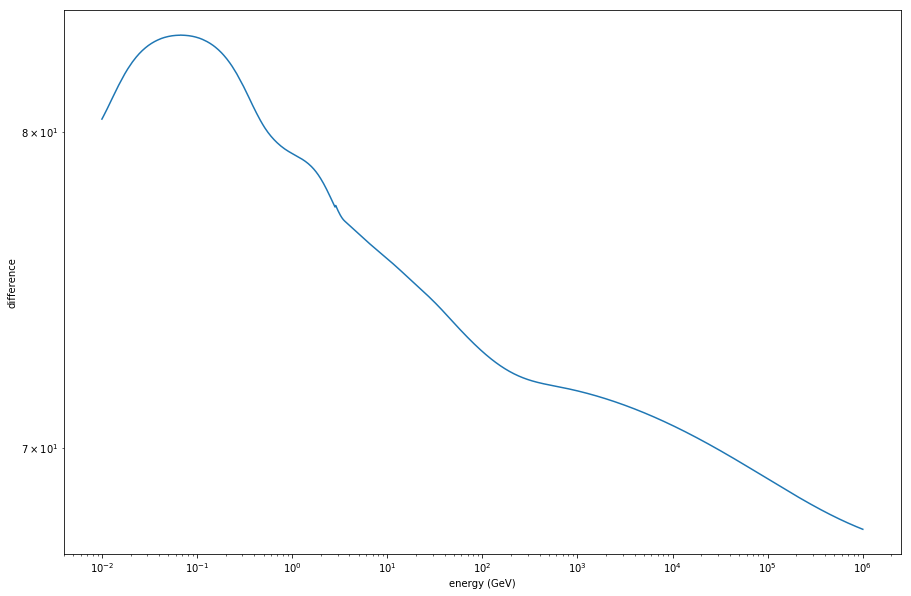

In [2]:
cluster = model.Cluster(silent=True)
cluster.nuclear_enhancement = True
e1, s1 = cluster.get_gamma_spectrum()
print(cluster._nuclear_enhancement)

cluster.nuclear_enhancement = False
e2, s2 = cluster.get_gamma_spectrum()
print(cluster._nuclear_enhancement)


spec1 = (e1**2*s1).to('MeV cm-2 s-1')
spec2 = (e2**2*s2).to('MeV cm-2 s-1')

fig = plt.figure(figsize=(15,10))
plt.loglog(e1, spec1, label='With nuclear enhancement')
plt.loglog(e2, spec2, '--', label='Without nuclear enhancement')
plt.ylabel('spectrum ('+str(spec1.unit)+')')
plt.xlabel('energy (GeV)')
plt.legend()

fig = plt.figure(figsize=(15,10))
plt.loglog(e1, (spec1-spec2)/spec2*100)
plt.ylabel('difference')
plt.xlabel('energy (GeV)')

# Test auto-plot tools

In [3]:
cluster = model.Cluster(silent=True)

In [4]:
cluster.output_dir = '/Users/adam/Desktop/test'
cluster.map_fov = 10*u.deg
cluster.plot(prod_list=['profile'])

# Test saving data

In [5]:
cluster = model.Cluster(silent=True)
cluster.output_dir = '/Users/adam/Desktop/test'

In [6]:
cluster.save_spectra()
cluster.save_profile()
cluster.save_map()

In [7]:
new_table = Table.read(cluster.output_dir+'/SPECTRA.fits')

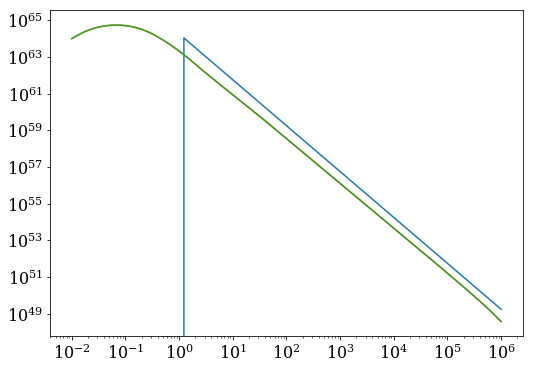

In [8]:
new_table
plt.loglog(new_table['Energy'], new_table['Spec_CRp'])
plt.loglog(new_table['Energy'], new_table['Spec_gamma_sph']*1e75)
plt.loglog(new_table['Energy'], new_table['Spec_gamma_cyl']*1e75)

In [9]:
hdul = fits.open('/Users/adam/Project/NIKA/Data/External_data/TaurusMainFilament/taurusN3-070.fits')
header = hdul[0].header
cluster.map_header = header
cluster.coord = SkyCoord("04h25m23.0s +27d03m18s", frame="icrs", unit="deg") # Perseus
cluster.save_map()

In [10]:
cluster.M500 = 1.1431e14*u.Msun
cluster.save_param()

In [11]:
cluster2 = model.Cluster()
cluster2.load_param(cluster.output_dir+'/parameters.pkl')
cluster2.print_param()

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
--- theta_truncation
    6.08920371533 deg
    <class 'astropy.units.quantity.Quantity'>
--- R_truncation
    4646.03293949 kpc
    <class 'astropy.units.quantity.Quantity'>
--- M500
    1.1431e+14 solMass
    <class 'astropy.units.quantity.Quantity'>
--- theta500
    0.985070523778 deg
    <class 'astropy.units.quantity.Quantity'>
--- de

In [12]:
cluster.print_param()

--- theta_truncation
    6.08920371533 deg
    <class 'astropy.units.quantity.Quantity'>
--- R_truncation
    4646.03293949 kpc
    <class 'astropy.units.quantity.Quantity'>
--- M500
    1.1431e+14 solMass
    <class 'astropy.units.quantity.Quantity'>
--- theta500
    0.985070523778 deg
    <class 'astropy.units.quantity.Quantity'>
--- name
    Cluster
    <type 'str'>
--- hse_bias
    0.2
    <type 'float'>
--- R500
    751.604038089 kpc
    <class 'astropy.units.quantity.Quantity'>
--- cosmo
    FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
    <class 'astropy.cosmology.core.FlatLambdaCDM'>
--- Epmax
    10.0 PeV
    <class 'astropy.units.quantity.Quantity'>
--- map_coord
    None
    <type 'NoneType'>
--- map_reso
    None
    <type 'NoneType'>
--- silent
    True
    <type 'bool'>
--- D_ang
    43.7164022351 Mpc
    <class 'astropy.units.quantity.Quantity'>
--- helium_mass_fraction
    0.245
    <type

# Test Gamma ray computation

In [2]:
cluster = model.Cluster(silent=True)
cluster.redshift = 0.012
cluster.map_fov = 10*u.deg
cluster.map_reso = 0.01*u.deg

In [6]:
m = cluster.get_gamma_template_map(NR500max=5.0, Npt_los=100)
header = cluster.get_map_header()

(map_tools.get_map_norm(m.to_value('sr-1'), header)-1)/100.0

1.615797944063413e-06

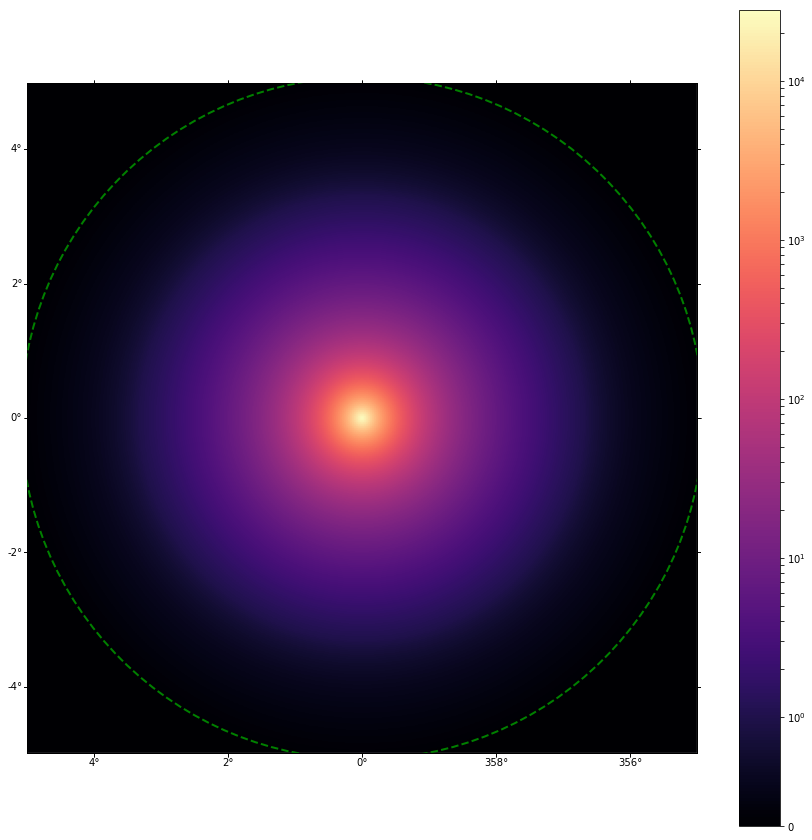

In [7]:
rad_show = cluster.theta_truncation.to_value('deg')
plt.figure(0, figsize=(15,15))
ax = plt.subplot(111, projection=WCS(header))
plt.imshow(m.to_value('sr-1'), vmin=0,origin='lower', cmap='magma', norm=SymLogNorm(1))
circle_500 = matplotlib.patches.Ellipse((cluster.coord.ra.value, cluster.coord.dec.value),
                                        2*rad_show/np.cos(cluster.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax.get_transform('fk5'))
ax.add_patch(circle_500)
plt.colorbar()

!!! WARNING: outside of 10MeV-1PeV, Naima appears to return wrong spectra (flat).


(1e-15, 1e-07)

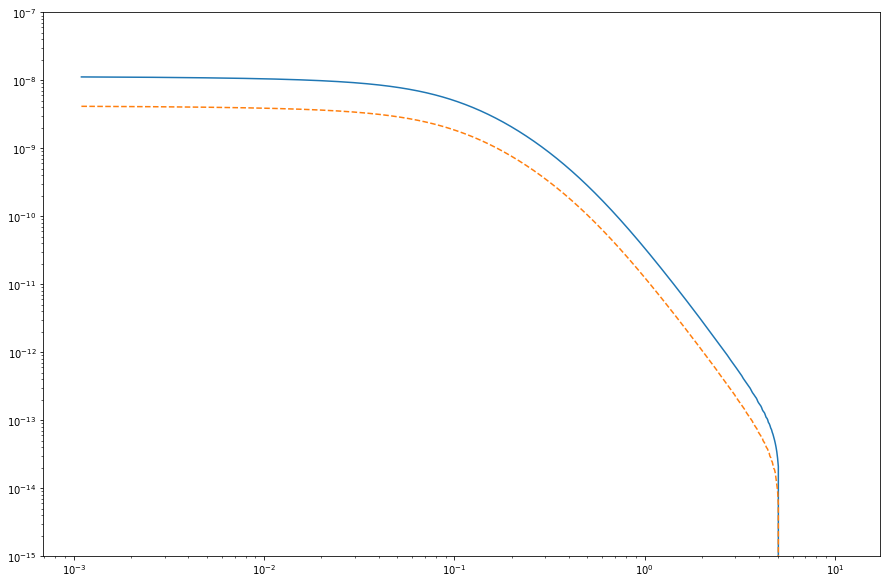

In [8]:
r1, p1 = cluster.get_gamma_profile(radius=np.logspace(0,4,1000)*u.kpc, 
                                 Emin=500*u.GeV, Emax=1*u.PeV, Energy_density=False,
                                 NR500max=5.0, Npt_los=100)
r2, p2 = cluster.get_gamma_profile(radius=np.logspace(0,4,1000)*u.kpc, 
                                 Emin=1000*u.GeV, Emax=10*u.PeV, Energy_density=False,
                                 NR500max=3, Npt_los=100)
plt.figure(0,figsize=(15,10))
plt.loglog((r1/cluster.D_ang*u.rad).to('deg'),p1.to('cm-2 s-1 sr-1'), '-')
plt.loglog((r2/cluster.D_ang*u.rad).to('deg'),p2.to('cm-2 s-1 sr-1'), '--')
plt.ylim(1e-15, 1e-7)

!!! WARNING: outside of 10MeV-1PeV, Naima appears to return wrong spectra (flat).
    E_min - Emax range : 1.0 MeV - 1.0000000000000002 PeV
!!! WARNING: outside of 10MeV-1PeV, Naima appears to return wrong spectra (flat).
    E_min - Emax range : 1.0 MeV - 1.0000000000000002 PeV


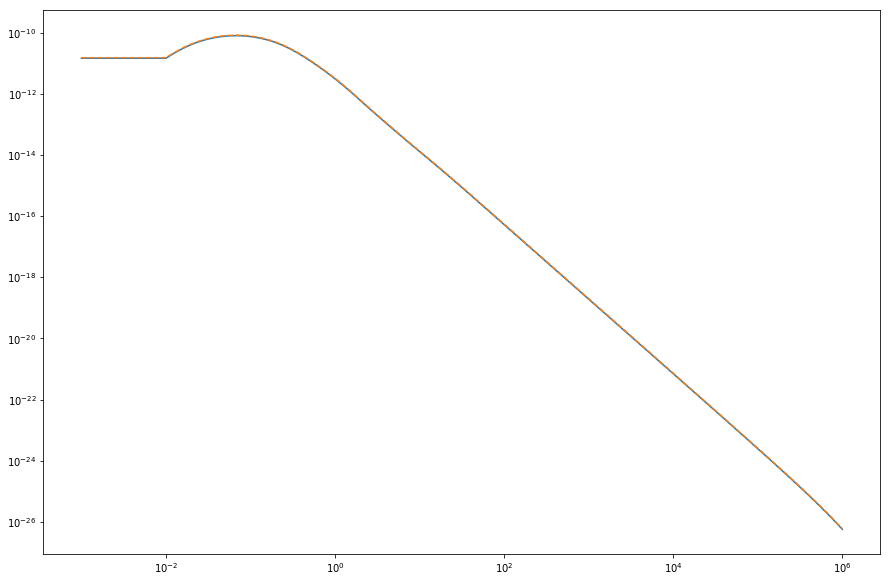

In [11]:
eng    = np.logspace(-3, 6, 100)*u.GeV
eng1, dN_dEdSdt1 = cluster.get_gamma_spectrum(eng, Rmax=1000*u.kpc, type_integral='spherical')
eng2, dN_dEdSdt2 = cluster.get_gamma_spectrum(eng, Rmax=1000*u.kpc, type_integral='cylindrical')

plt.figure(1,figsize=(15,10))
plt.loglog(eng1, dN_dEdSdt1, '')
plt.loglog(eng2, dN_dEdSdt2, '--')

In [12]:
cluster.X_cr = {'X':1e-2, 'Rcut':1000*u.kpc}

Rmax = 100*u.kpc
Nptrad = 100
eng    = np.logspace(-2, 4, 100)*u.GeV

# Method 1: parsing Naima somehow
radius1 = np.logspace(0, 4, 1000)*u.kpc
bid, nh_r  = cluster.get_density_gas_profile(radius1)
bid, ncr_r = cluster.get_normed_density_crp_profile(radius1)

V_cross = cluster_profile.get_volume_any_model(radius1.to_value('kpc'), nh_r.to_value('cm-3')*ncr_r, Rmax.to_value('kpc')) * u.kpc**3
V_auto  = cluster_profile.get_volume_any_model(radius1.to_value('kpc'), ncr_r, cluster.X_cr['Rcut'].to_value('kpc')) * u.kpc**3

CRp1 = naima.models.PowerLaw(1.0/u.GeV, 1.0*u.GeV, cluster.spectrum_crp_model['Index'])
g1 = naima.models.PionDecay(CRp1, nh=1.0*u.Unit('cm**-3'))
Unorm = cluster.X_cr['X']*cluster.get_thermal_energy_profile(cluster.X_cr['Rcut'])[1][0]
g1.set_Wp(Unorm, Epmin=cluster.Epmin, Epmax=cluster.Epmax)
dN_dEdSdt1 = (V_cross/V_auto).to_value('') * g1.flux(eng, distance=cluster.D_lum).to('MeV-1 cm-2 s-1')

# Method 3: parsing Naima with a hand defined normalization
eng3, dN_dEdSdt3 = cluster.get_gamma_spectrum(eng, Rmax=Rmax, type_integral='spherical')
    
# Method 2: direct shell integration
radius2 = np.logspace(0, np.log10(Rmax.to_value('kpc')), Nptrad)*u.kpc
bid, nh_r  = cluster.get_density_gas_profile(radius2)
bid, X_r   = cluster.get_crp_to_thermal_energy_profile(radius2)
bid, Uth_r = cluster.get_thermal_energy_profile(radius2)

CRp2 = naima.models.PowerLaw(1.0/u.GeV, 1.0*u.GeV, cluster.spectrum_crp_model['Index'])

for i in range(Nptrad):
    if i>0 : 
        UCR_shell = X_r[i].to_value('adu')*Uth_r[i] - X_r[i-1].to_value('adu')*Uth_r[i-1]
    else:
        UCR_shell = X_r[i].to_value('adu')*Uth_r[i]
    g2 = naima.models.PionDecay(CRp2, nh=nh_r[i])
    g2.set_Wp(UCR_shell,Epmin=cluster.Epmin, Epmax=cluster.Epmax)
    if i==0 : dN_dEdSdt2 = g2.flux(eng, distance=cluster.D_lum).to('MeV-1 cm-2 s-1')
    else : dN_dEdSdt2 += g2.flux(eng, distance=cluster.D_lum).to('MeV-1 cm-2 s-1')

(0.01, 10.0)

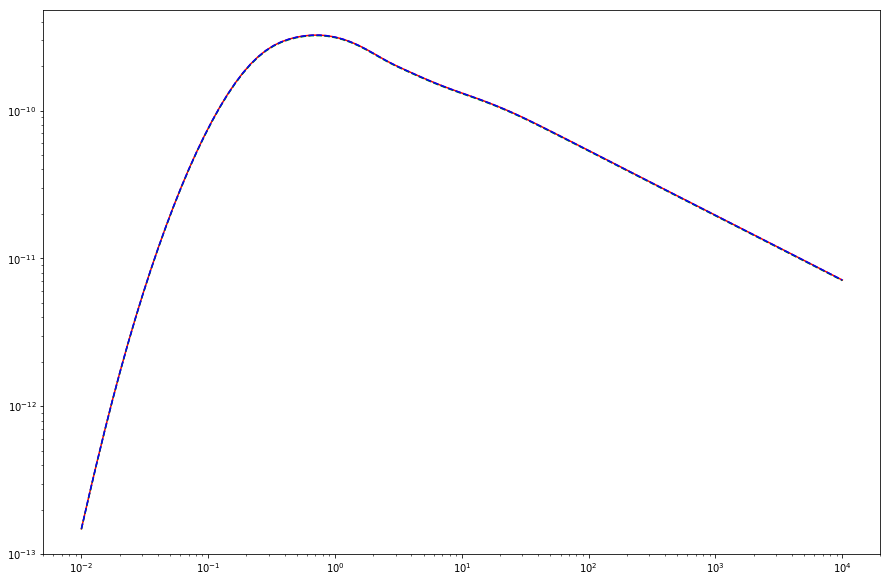

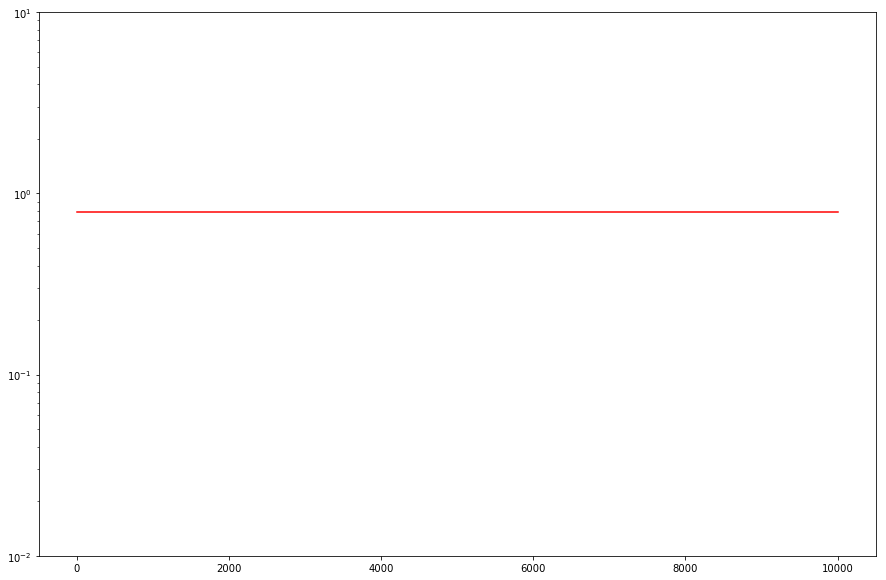

In [13]:
# Plots
plt.figure(1,figsize=(15,10))
plt.loglog(eng.to('GeV'), (eng**2*dN_dEdSdt1).to('GeV cm-2 s-1'), 'r')
plt.loglog(eng.to('GeV'), (eng**2*dN_dEdSdt2).to('GeV cm-2 s-1'), 'g--')
plt.loglog(eng.to('GeV'), (eng**2*dN_dEdSdt3).to('GeV cm-2 s-1'), 'b--')

plt.figure(2,figsize=(15,10))
plt.plot(eng.to('GeV'), 100*((eng**2*dN_dEdSdt3).to('GeV cm-2 s-1') - (eng**2*dN_dEdSdt2).to('GeV cm-2 s-1'))/(eng**2*dN_dEdSdt3).to('GeV cm-2 s-1') , 'r')
plt.yscale('log')
plt.ylim(1e-2,1e1)

In [9]:
# check that calculating the flux from spectrum and then profile is similar as the other way around
Emin = 10*u.MeV
Emax = 1*u.PeV
Rmax = cluster.R500

# Get the spectrum and integrate
energy=np.logspace(np.log10(Emin.to_value('GeV')),np.log10(Emax.to_value('GeV')),1000)*u.GeV
energy, dN_dEdSdt = cluster.get_gamma_spectrum(energy, Rmax=Rmax, type_integral='cylindrical', NR500max=5, Npt_los=100)
flux1 = cluster_spectra.get_integral_any_model(energy.to_value('GeV'),
                                               dN_dEdSdt.to_value('GeV-1 cm-2 s-1'),#*energy.to_value('GeV'),
                                               Emin.to_value('GeV'), Emax.to_value('GeV')) * u.Unit('cm-2 s-1')

# Get the profile and integrate
r3d = cluster_profile.define_safe_radius_array(np.array([Rmax.to_value('kpc')]), Rmin=1.0)*u.kpc
r2d, dN_dSdtdO  = cluster.get_gamma_profile(r3d, Emin=Emin, Emax=Emax, Energy_density=False, NR500max=5, Npt_los=100)

integrand = dN_dSdtdO.to_value('cm-2 s-1 sr-1') / cluster.D_ang.to_value('kpc')**2
flux2 = cluster_profile.get_surface_any_model(r2d.to_value('kpc'), integrand, Rmax.to_value('kpc'), Npt=1000)*u.cm**-2*u.s**-1#*u.GeV
            
    
flux3 = cluster.get_gamma_flux(Rmax=Rmax, type_integral='cylindrical', NR500max=5.0, Npt_los=100,
                       Emin=Emin, Emax=Emax, Energy_density=False)
    
flux1,flux2,flux3, (flux2-flux1)/flux2

(<Quantity 2.73313054e-08 1 / (cm2 s)>,
 <Quantity 2.73313054e-08 1 / (cm2 s)>,
 <Quantity 2.73313054e-08 1 / (cm2 s)>,
 <Quantity 3.6317941e-16>)

# Test CRp model

In [20]:
cluster = model.Cluster()
cluster2 = model.Cluster()

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
          

Getting R500 value
Setting cosmic ray to thermal pressure ratio value
Getting R_truncation value
Setting cosmic ray to thermal pressure ratio value
Getting R500 value
Setting cosmic ray to thermal pressure ratio value
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure
Getting the cosmic ray / thermal pressure


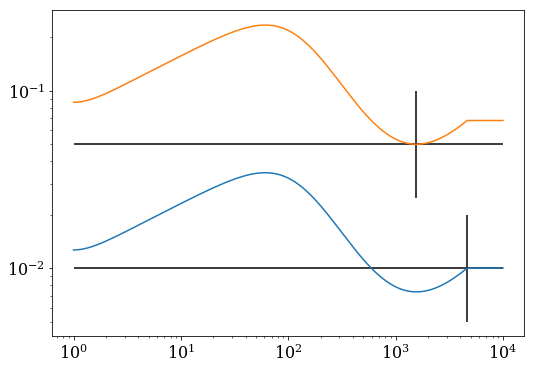

In [21]:
cluster.X_cr = {'X':1e-2, 'Rcut':cluster.R500*5}
cluster.X_cr = {'X':1e-2, 'Rcut':cluster.R_truncation}
cluster2.X_cr = {'X':5e-2, 'Rcut':cluster.R500}

#cluster.density_crp_model = {'name':'GNFW', 'a':cluster.pressure_gas_model['a'], 
#                             'b':cluster.pressure_gas_model['b'], 'c':cluster.pressure_gas_model['c'], 
#                             'r_p':cluster.pressure_gas_model['r_p']}
r, x = cluster.get_crp_to_thermal_energy_profile()
r2, x2 = cluster2.get_crp_to_thermal_energy_profile()
plt.loglog(r,x)
plt.loglog(r2,x2)
plt.hlines(cluster.X_cr['X'], 1,1e4)
plt.vlines(cluster.X_cr['Rcut'].to_value('kpc'), cluster.X_cr['X']/2,cluster.X_cr['X']*2)
plt.hlines(cluster2.X_cr['X'], 1,1e4)
plt.vlines(cluster2.X_cr['Rcut'].to_value('kpc'), cluster2.X_cr['X']/2,cluster2.X_cr['X']*2)

Setting spectrum_crp_model value
Setting spectrum_crp_model value


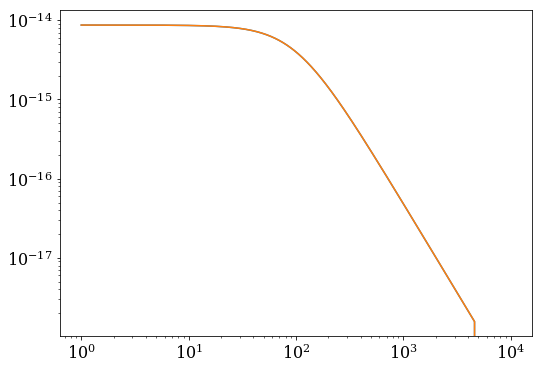

In [22]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
r1, n1 = cluster.get_density_crp_profile(Emin=0.1*u.TeV, Emax=10*u.PeV)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
r2, n2 = cluster.get_density_crp_profile(Emin=0.1*u.TeV, Emax=100*u.PeV)
plt.loglog(r1, n1)
plt.loglog(r2, n2)

Setting spectrum_crp_model value
Setting spectrum_crp_model value
Setting spectrum_crp_model value
Getting the cosmic ray / thermal pressure
Getting R500 value
Setting cosmic ray to thermal pressure ratio value


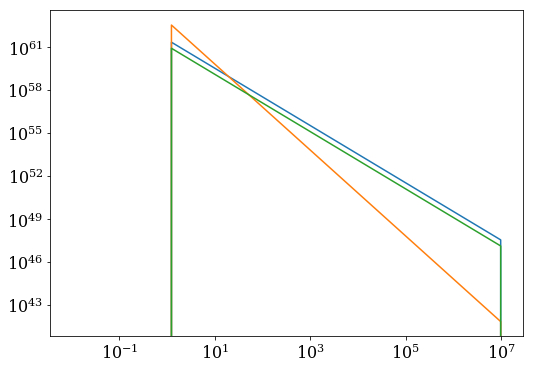

In [23]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.0}
e1, s1 = cluster.get_crp_spectrum(Rmax=100*u.kpc)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':3.0}
e2, s2 = cluster.get_crp_spectrum(Rmax=100*u.kpc)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.0}

cluster.X_cr = {'X':cluster.X_cr['X'], 'Rcut':0.1*cluster.R500}
e3, s3 = cluster.get_crp_spectrum(Rmax=100*u.kpc)

plt.loglog(e1,s1)
plt.loglog(e2,s2)
plt.loglog(e3,s3)

In [24]:
cluster.density_crp_model

Getting the cosmic ray proton density profile model value


{'beta': 0.75, 'name': 'beta', 'r_c': <Quantity 100. kpc>}

In [25]:
cluster.density_crp_model = {'name':'GNFW', 'a':1, 'b':1, 'c':1, 'r_p':100*u.kpc}
cluster.density_crp_model = {'name':'beta', 'beta':1, 'r_c':1*u.kpc}
cluster.density_crp_model = {'name':'doublebeta', 'beta1':1, 'beta2':1, 'r_c1':1*u.kpc, 'r_c2':1*u.kpc, 'n_01':1.0, 'n_02':1.0}
cluster.density_crp_model = {'name':'SVM', 'beta':1, 'alpha':1, 'gamma':1, 'epsilon':1, 'r_c':1*u.kpc, 'r_s':1.0*u.kpc}

Setting density_crp_model value
Setting density_crp_model value
Setting density_crp_model value
Setting density_crp_model value


In [26]:
cluster.density_crp_model

Getting the cosmic ray proton density profile model value


{'alpha': 1,
 'beta': 1,
 'epsilon': 1,
 'gamma': 1,
 'name': 'SVM',
 'r_c': <Quantity 1. kpc>,
 'r_s': <Quantity 1. kpc>}

In [27]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
cluster.spectrum_crp_model = {'name':'ExponentialCutoffPowerLaw', 'Index':1.0, 'CutoffEnergy':1e3*u.TeV}

Setting spectrum_crp_model value
Setting spectrum_crp_model value


In [28]:
cluster.spectrum_crp_model

Getting the cosmic ray proton spectrum parameters value


{'CutoffEnergy': <Quantity 1000. TeV>,
 'Index': 1.0,
 'name': 'ExponentialCutoffPowerLaw'}

Setting density_crp_model value


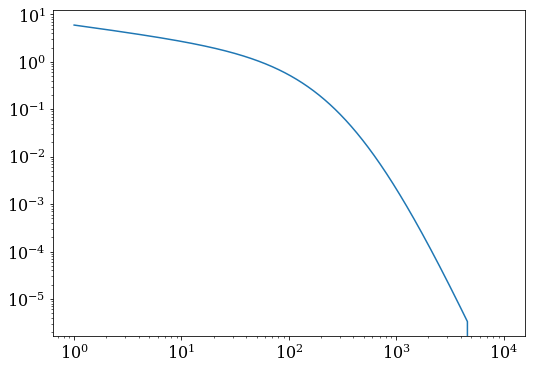

In [29]:
cluster.density_crp_model = {'name':'GNFW', 'a':1.0, 'b': 5.0, 'c':0.3, 'r_p':400*u.kpc}

r, fr = cluster.get_normed_density_crp_profile()
plt.loglog(r, fr)

Setting spectrum_crp_model value
Setting Epmax value


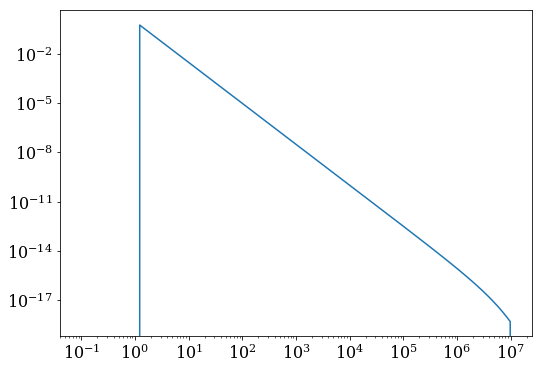

In [30]:
#cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.5}
cluster.spectrum_crp_model = {'name':'ExponentialCutoffPowerLaw', 'Index':2.5, 'CutoffEnergy':5.0*u.PeV}
cluster.Epmax = 10*u.PeV
e, fe = cluster.get_normed_crp_spectrum(np.logspace(-1,7,1000)*u.GeV)
plt.loglog(e, fe)

Getting R500 value


<Quantity [5.20829454e+63] erg>

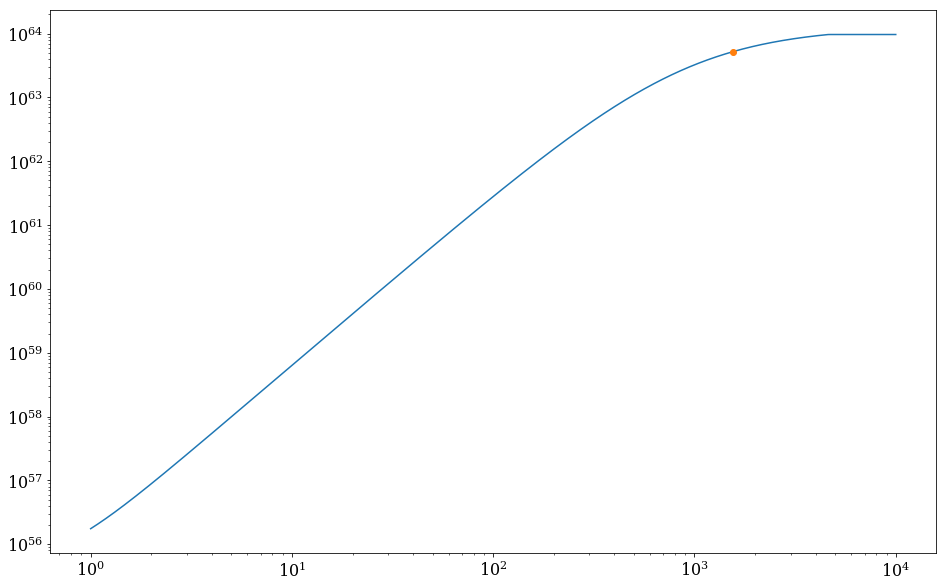

In [31]:
r, uth = cluster.get_thermal_energy_profile()
rl, uthl = cluster.get_thermal_energy_profile(cluster.R500)

plt.figure(figsize=(15,10))
plt.loglog(r, uth.to('erg'))
plt.loglog(rl, uthl.to('erg'), 'o')
uthl.to('erg')

# Test pressure, density, temperature profiles

In [32]:
cluster = model.Cluster()

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 


In [33]:
# pressure profile
cluster = model.Cluster()
#cluster.R_truncation = np.inf*u.kpc
r1, p_r1 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10UPP')
r2, p_r2 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10MD')
r3, p_r3 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10CC')
r4, p_r4 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('P13UPP')
r5, p_r5 = cluster.get_pressure_gas_profile()

cluster.theta500 = 0.1*u.deg
print(cluster.R500, cluster.M500)
cluster.set_pressure_gas_gNFW_param('P13UPP')
r6, p_r6 = cluster.get_pressure_gas_profile()

cluster.R_truncation = np.inf*u.kpc
r7, p_r7 = cluster.get_pressure_gas_profile()

cluster.pressure_gas_model = {'name':'GNFW', 'P_0':1*u.Unit('keV cm-3'), 'a':2.0,'b':5.0,'c':0.0, 'r_p':500.0*u.kpc}
r8, p_r8 = cluster.get_pressure_gas_profile()

cluster.pressure_gas_model = {'name':'isoT', 'T':10*u.keV}
r9, p_r9 = cluster.get_pressure_gas_profile()

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
Setting gNFW Arnaud et al. (2010) UPP to compute it from M and z.
Setting gNFW Arnaud et al. (2010) morphologically disturbed to compute it from M and z.
Setting gNFW Arnaud et al. (2010) cool-core to compute it from M and z.
Setting gNFW Planck coll. (2013) UPP to compute it from M and z.
Setting theta500 value
Setting: R500, M500 ; Fixi

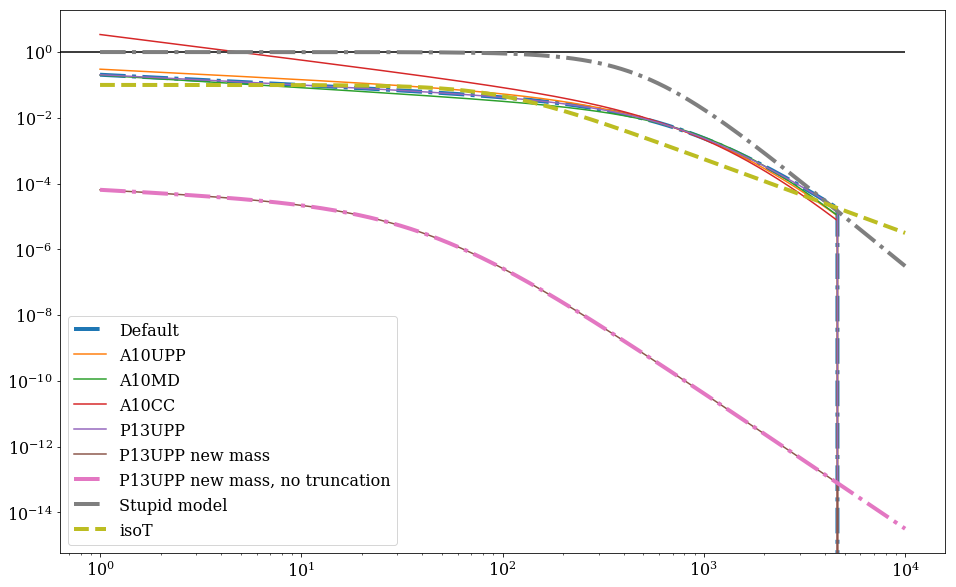

In [34]:
plt.figure(figsize=(15,10))
plt.loglog(r1, p_r1, '-.', linewidth=4, label='Default')
plt.loglog(r2, p_r2, label='A10UPP')
plt.loglog(r3, p_r3, label='A10MD')
plt.loglog(r4, p_r4, label='A10CC')
plt.loglog(r5, p_r5, label='P13UPP')
plt.loglog(r6, p_r6, label='P13UPP new mass')
plt.loglog(r7, p_r7, '-.', linewidth=4, label='P13UPP new mass, no truncation')
plt.loglog(r8, p_r8, '-.', linewidth=4, label='Stupid model')
plt.loglog(r9, p_r9, '--', linewidth=4, label='isoT')
plt.hlines(1,0,1e4)
plt.legend()

In [35]:
cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-2*u.Unit('cm-3'), 'beta1':2.0, 'r_c1':500.0*u.kpc,
                             'n_02':1e-2*u.Unit('cm-3'), 'beta2':2.0, 'r_c2':500.0*u.kpc}
print(cluster.density_gas_model)

cluster.density_gas_model = {'name':'SVM', 
                            'n_0':1.0*u.cm**-3,'beta':1,'r_c':100*u.kpc,'r_s':1*u.kpc, 
                             'alpha':1, 'gamma':1, 'epsilon':1}
print(cluster.density_gas_model)

Setting density_gas_model value
Getting the gas electron density profile model value
{'name': 'doublebeta', 'beta2': 2.0, 'beta1': 2.0, 'n_01': <Quantity 0.01 1 / cm3>, 'n_02': <Quantity 0.01 1 / cm3>, 'r_c1': <Quantity 500. kpc>, 'r_c2': <Quantity 500. kpc>}
Setting density_gas_model value
Getting the gas electron density profile model value
{'beta': 1, 'r_s': <Quantity 1. kpc>, 'name': 'SVM', 'epsilon': 1, 'alpha': 1, 'r_c': <Quantity 100. kpc>, 'n_0': <Quantity 1. 1 / cm3>, 'gamma': 1}


In [36]:
cluster.R_truncation = 2500*u.kpc

cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-2*u.Unit('cm-3'), 'beta1':2.0, 'r_c1':100.0*u.kpc,
                             'n_02':1e-3*u.Unit('cm-3'), 'beta2':0.5, 'r_c2':500.0*u.kpc}
r1, n_r1 = cluster.get_density_gas_profile()

cluster.density_gas_model = {'name':'beta', 
                             'n_0':1e-3*u.Unit('cm-3'), 'beta':0.5, 'r_c':500.0*u.kpc}
r2, n_r2 = cluster.get_density_gas_profile()

cluster.density_gas_model = {'name':'SVM', 
                            'n_0':1e-3*u.cm**-3,'beta':0.5,'r_c':500*u.kpc,'r_s':5000*u.kpc, 
                             'alpha':0.3, 'gamma':3, 'epsilon':15.0}
r3, n_r3 = cluster.get_density_gas_profile()

Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting density_gas_model value
Setting density_gas_model value
Setting density_gas_model value


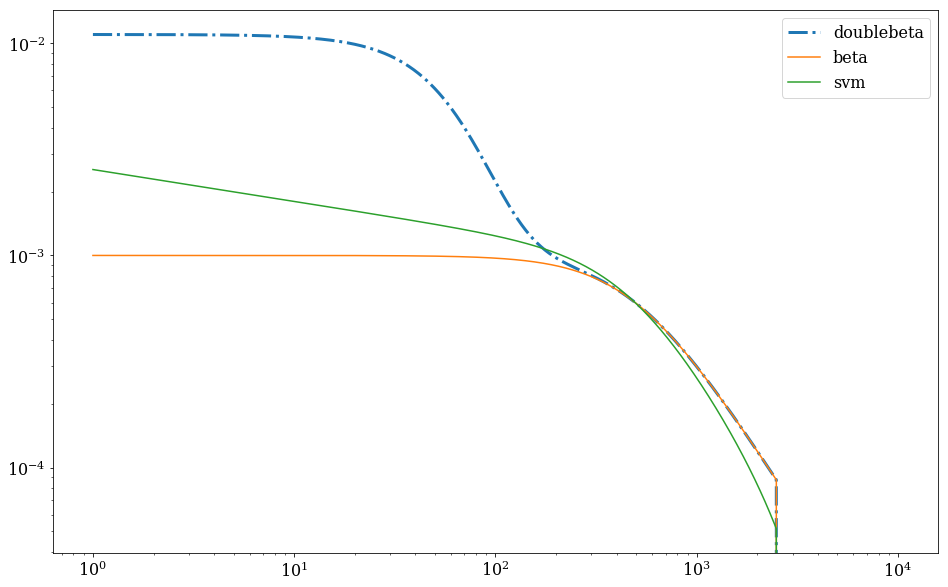

In [37]:
plt.figure(figsize=(15,10))
plt.loglog(r1, n_r1, '-.', linewidth=3, label='doublebeta')
plt.loglog(r2, n_r2, label='beta')
plt.loglog(r3, n_r3, label='svm')
plt.legend()

In [38]:
cluster.set_pressure_gas_gNFW_param('P13UPP')

r1, T_r1 = cluster.get_temperature_gas_profile()
cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-1*u.Unit('cm-3'), 'beta1':1.5, 'r_c1':50.0*u.kpc,
                             'n_02':1e-3*u.Unit('cm-3'), 'beta2':0.5, 'r_c2':500.0*u.kpc}
cluster.set_pressure_gas_gNFW_param('A10MD')
r2, T_r2 = cluster.get_temperature_gas_profile()

Setting gNFW Planck coll. (2013) UPP to compute it from M and z.
Setting density_gas_model value
Setting gNFW Arnaud et al. (2010) morphologically disturbed to compute it from M and z.


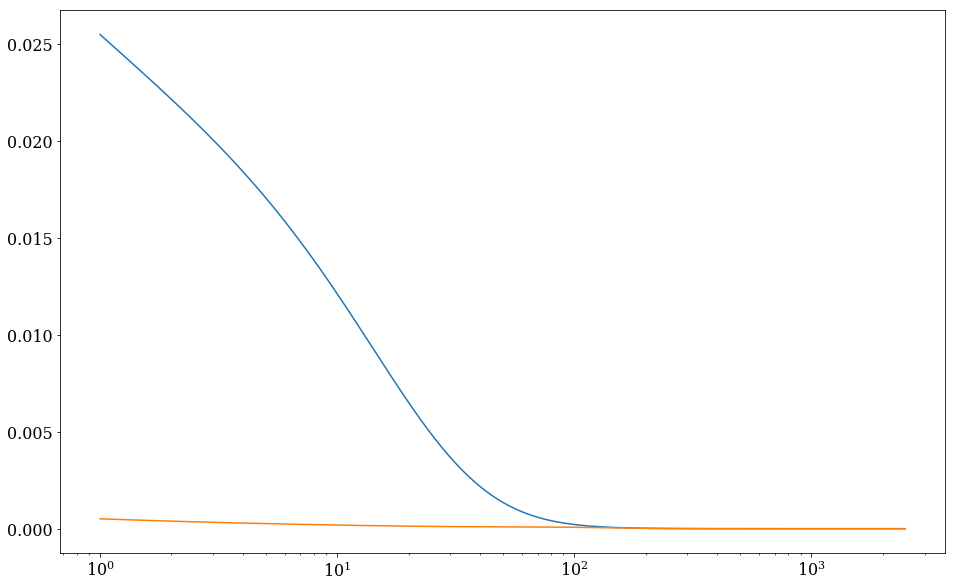

In [39]:
plt.figure(figsize=(15,10))
plt.plot(r1, T_r1)
plt.plot(r2, T_r2)
plt.xscale('log')

# Derived mass and integrated quantities

In [40]:
cluster = model.Cluster()
cluster.R_truncation = 5000.0*u.kpc#np.inf*u.kpc
print(cluster.R500)
print(cluster.M500)

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Getting R500 value
1548.6776465 kpc
Getting M500 value
1e+15 solMass


In [41]:
cluster.set_pressure_gas_gNFW_param('A10CC')
cluster.density_gas_model = {'name':'SVM', 
                             'n_0':3e-2*u.cm**-3,'beta':0.0,'r_c':50.0*u.kpc,'r_s':500.0*u.kpc, 
                             'alpha':0.8, 'gamma':1.0, 'epsilon':6.0}

Setting gNFW Arnaud et al. (2010) cool-core to compute it from M and z.
Setting density_gas_model value


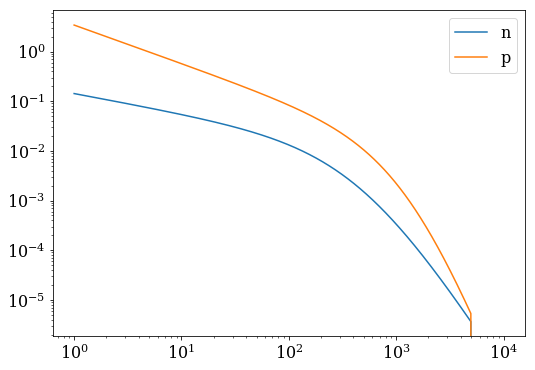

In [42]:
r,p = cluster.get_pressure_gas_profile()
r,n = cluster.get_density_gas_profile()
plt.loglog(r, n, label='n')
plt.loglog(r,p, label='p')
plt.legend()

In [43]:
r, mhse = cluster.get_hse_mass_profile()

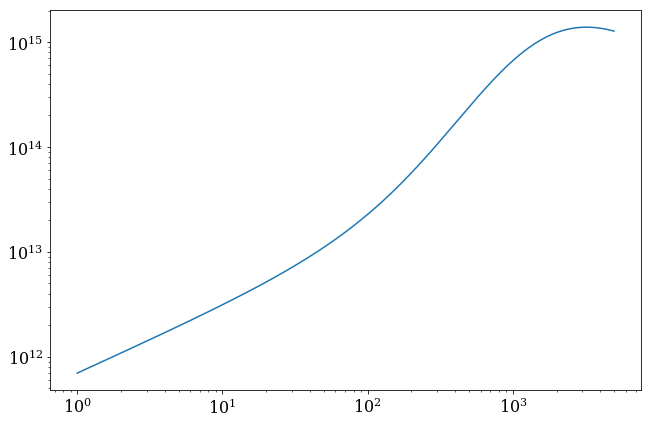

In [44]:
plt.figure(figsize=(10,7))
plt.plot(r, mhse)
plt.xscale('log')
plt.yscale('log')

Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
The truncation was reached before R200
nan solMass


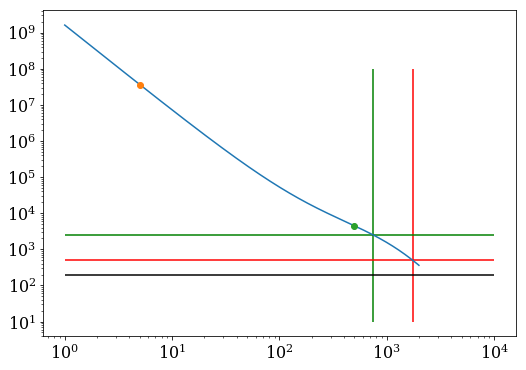

In [45]:
cluster.R_truncation = 2000.0*u.kpc#np.inf*u.kpc

r, delta = cluster.get_overdensity_contrast_profile()
r1, delta1 = cluster.get_overdensity_contrast_profile(5*u.kpc)
r2, delta2 = cluster.get_overdensity_contrast_profile(500*u.kpc)
r2500_p, m2500_p = cluster.get_mdelta_from_profile(2500, 10*u.kpc, 1e5*u.kpc)
r500_p, m500_p = cluster.get_mdelta_from_profile(500, 10*u.kpc, 1e4*u.kpc)
r200_p, m200_p = cluster.get_mdelta_from_profile(200, 10*u.kpc, 1e5*u.kpc)
plt.loglog(r, delta)
plt.loglog(r1, delta1, 'o')
plt.loglog(r2, delta2, 'o')
plt.vlines(r2500_p.to_value('kpc'), 10, 1e8, color='g')
plt.vlines(r500_p.to_value('kpc'), 10, 1e8, color='r')
plt.vlines(r200_p.to_value('kpc'), 10, 1e8)
plt.hlines(2500, 1e0, 1e4, color='g')
plt.hlines(500, 1e0, 1e4, color='r')
plt.hlines(200, 1e0, 1e4)
print(m200_p)

(100000000.0, 100000000000.0)

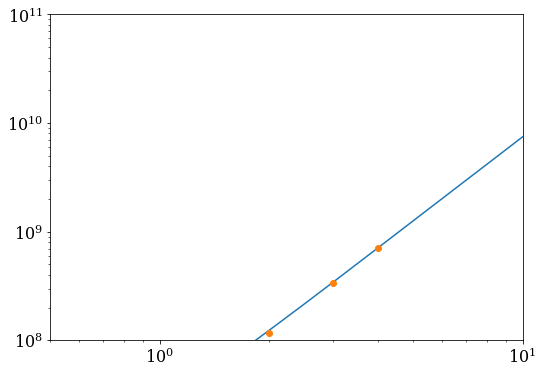

In [46]:
r, mgas = cluster.get_gas_mass_profile()
r1, mgas1 = cluster.get_gas_mass_profile([1,2,3,4]*u.kpc)
plt.loglog(r, mgas)
plt.loglog(r1, mgas1, 'o')
plt.xlim(0.5,10)
plt.ylim(1e8,1e11)

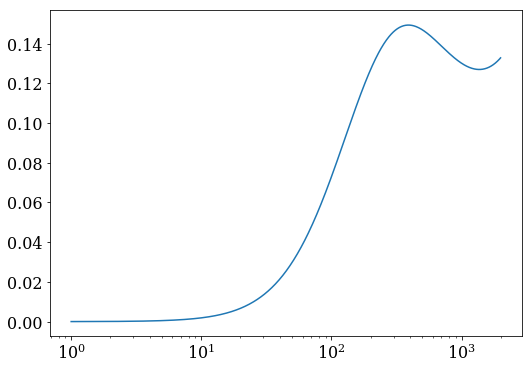

In [47]:
r, fgas = cluster.get_fgas_profile()
plt.plot(r, fgas)
plt.xscale('log')

In [48]:
r,n = cluster.get_density_gas_profile(100.0*u.kpc)
print(r, n)

(<Quantity [100.] kpc>, <Quantity [0.01315726] 1 / cm3>)


# Compton parameter

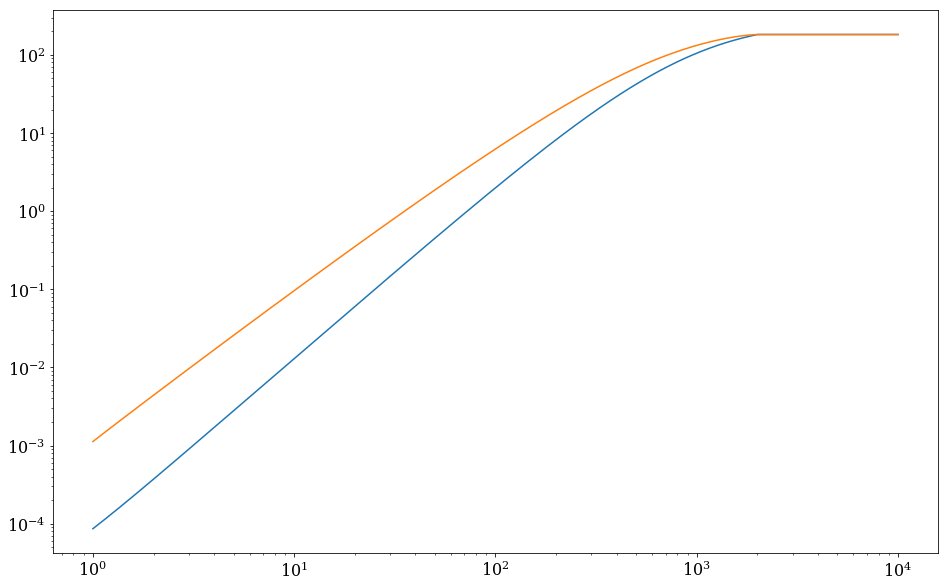

In [49]:
plt.figure(figsize=(15,10))
rsph, ysph = cluster.get_ysph_profile()
rcyl, ycyl = cluster.get_ycyl_profile()
plt.loglog(rsph, ysph)
plt.loglog(rcyl, ycyl)

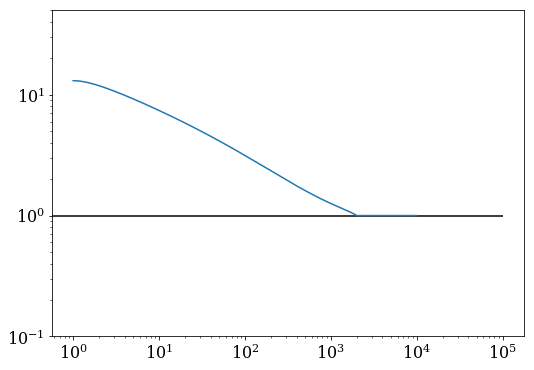

In [50]:
plt.plot(rcyl, ycyl/ysph)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,50)
plt.hlines(1,0,1e5)

Getting R500 value
1548.6776465 kpc
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Getting R500 value
Getting R500 value


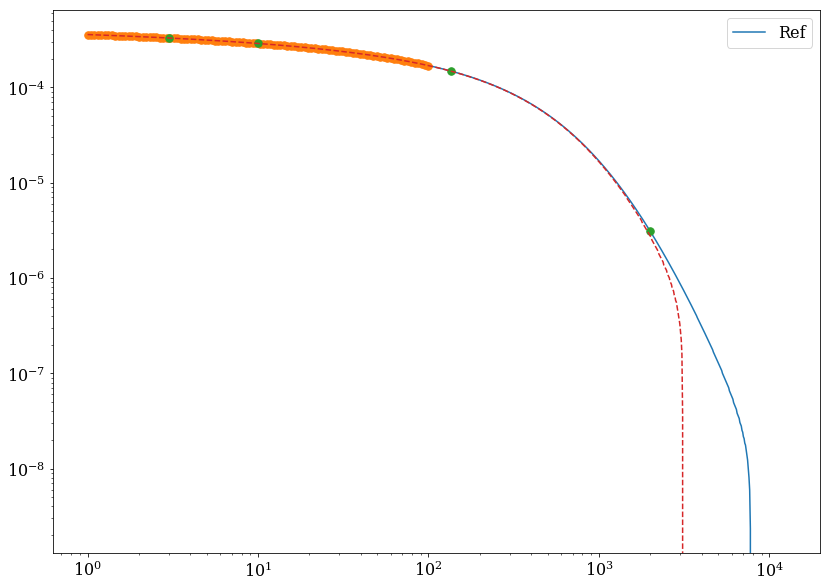

In [51]:
print(cluster.R500)
cluster.R_truncation = np.inf*u.kpc
Rp, y = cluster.get_y_compton_profile(np.logspace(0,np.log10(8*cluster.R500.to_value('kpc')),1000)*u.kpc)
Rp3, y3 = cluster.get_y_compton_profile(np.logspace(0,np.log10(8*cluster.R500.to_value('kpc')),1000)*u.kpc,NR500max=2)
Rp1, y1 = cluster.get_y_compton_profile(np.logspace(0,2, 100)*u.kpc)
Rp2, y2 = cluster.get_y_compton_profile([3,10,135,2000]*u.kpc)
plt.figure(figsize=(13,10))
plt.plot(Rp, y, label='Ref')
plt.plot(Rp1, y1, '.', markersize=15)
plt.plot(Rp2, y2, '.', markersize=15)
plt.plot(Rp3, y3, '--', markersize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [52]:
r, m = cluster.get_gas_mass_profile()
r2, m2 = cluster.get_gas_mass_profile(600*u.kpc)

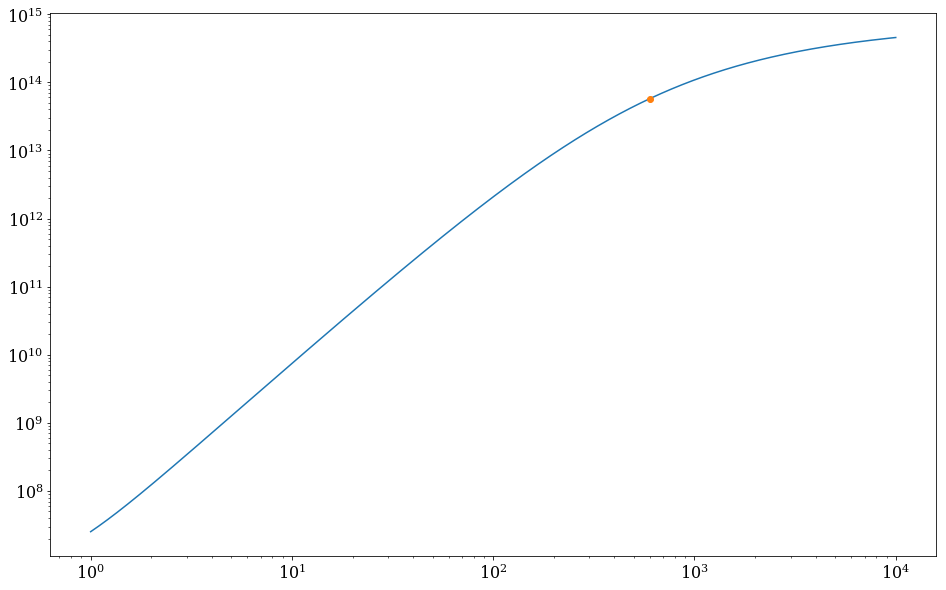

In [53]:
plt.figure(figsize=(15,10))
plt.loglog(r, m)
plt.loglog(r2, m2, 'o')

In [54]:
r, m = cluster.get_fgas_profile()
r2,m2 = cluster.get_fgas_profile(600*u.kpc)
r3,m3 = cluster.get_fgas_profile(1200*u.kpc)

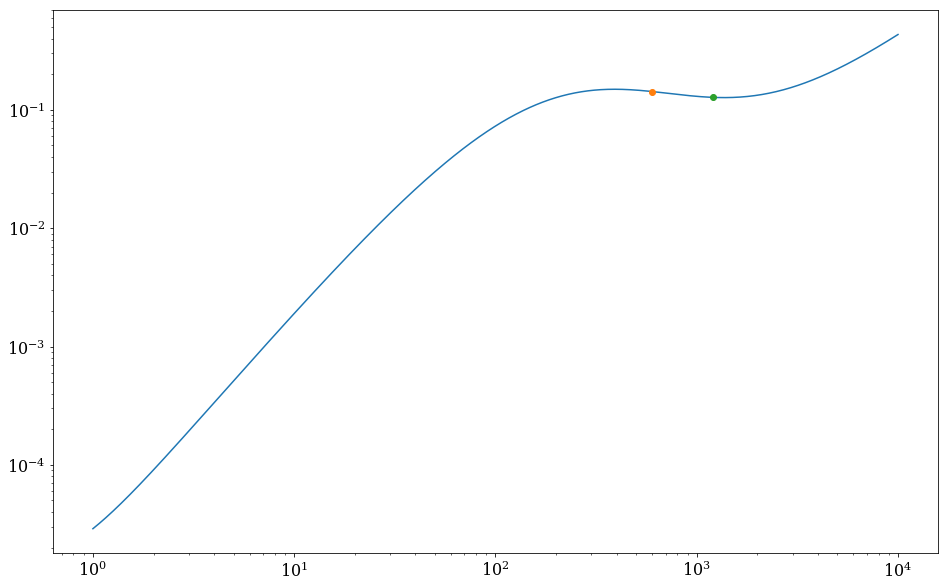

In [55]:
plt.figure(figsize=(15,10))
plt.loglog(r, m)
plt.loglog(r2, m2, 'o')
plt.loglog(r3, m3, 'o')

# Maps

In [56]:
# Extract a map as template

reso_out = 1.0/60          # Pixel size in deg
FoV_out  = 6.0             # Size of the field of view
coord1    = SkyCoord("03h19m47.2s +41d30m47s", frame="icrs", unit="deg") # Perseus
coord2    = SkyCoord("194.953d  27.9806d", frame="icrs", unit="deg") # Coma

dat_dir = os.getenv('CTAPHYS_EDAT_DIR')
ymap_file  = dat_dir+'/Planck/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits'
ymap1, header1 = map_tools.roi_extract_healpix(ymap_file, coord1.ra.value, coord1.dec.value, 
                                   reso_out, [FoV_out, FoV_out], visu=False)
ymap2, header2 = map_tools.roi_extract_healpix(ymap_file, coord2.ra.value, coord2.dec.value, 
                                   reso_out, [FoV_out, FoV_out], visu=False)
FWHM2sigma = 1.0/(2.0*np.sqrt(2*np.log(2)))
sm = 5.0
ymap1 = ndimage.gaussian_filter(ymap1, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)
ymap2 = ndimage.gaussian_filter(ymap2, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)

/Users/adam/anaconda2/envs/cta/lib/python2.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [57]:
# Model Perseus
cluster1 = model.Cluster()
cluster1.R_truncation = np.inf*u.kpc
cluster1.M500 = 7e14*u.Msun
cluster1.redshift = 0.0179
cluster1.coord = {'RA':coord1.ra, 'Dec':coord1.dec}
cluster1.set_pressure_gas_gNFW_param('P13UPP')

#cluster1.map_coord = coord1
#cluster1.map_reso = reso_out*u.deg
#cluster1.map_fov = [FoV_out, FoV_out]*u.deg
cluster1.map_header = header1

# Model Coma
cluster2 = model.Cluster()
cluster2.R_truncation = np.inf*u.kpc
cluster2.M500 = 6e14*u.Msun
cluster2.redshift = 0.023
cluster2.coord = {'RA':coord2.ra, 'Dec':coord2.dec}
cluster2.set_pressure_gas_gNFW_param('P13UPP')

#cluster2.map_coord = coord2
#cluster2.map_reso = reso_out*u.deg
#cluster2.map_fov = [FoV_out, FoV_out]*u.deg
cluster2.map_header = header2

                 ______ _____ _____ ______ _____                 
                 | ___ \  ___|  __ \| ___ \  ___|                
                 | |_/ / |__ | |  \/| |_/ / |__                  
                 |  __/|  __|| | __ |    /|  __|                 
                 | |   | |___| |_\ \| |\ \| |___                 
                 \_|   \____/ \____/\_| \_\____/                 
                                                                 
  Pipeline for the Estimation of Gamma Ray Emission in clusters  
-----------------------------------------------------------------
                                                                 
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting M500 value
Setting: R500, theta500 ; Fixing: redshift, cosmo, D_ang
Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.
Setting coord value
Setting gNFW Planck coll. (2013) UPP to compute it from M and z.
Setting the ma

In [58]:
# Get the model ymaps
h1 = cluster1.get_map_header()
y1 = cluster1.get_ymap(FWHM=np.sqrt(10.0**2+sm**2)*u.arcmin, NR500max=5.0, Npt_los=100)
h2 = cluster2.get_map_header()
y2 = cluster2.get_ymap(FWHM=np.sqrt(10.0**2+sm**2)*u.arcmin, NR500max=5.0, Npt_los=100)

Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates
Getting the coordinates


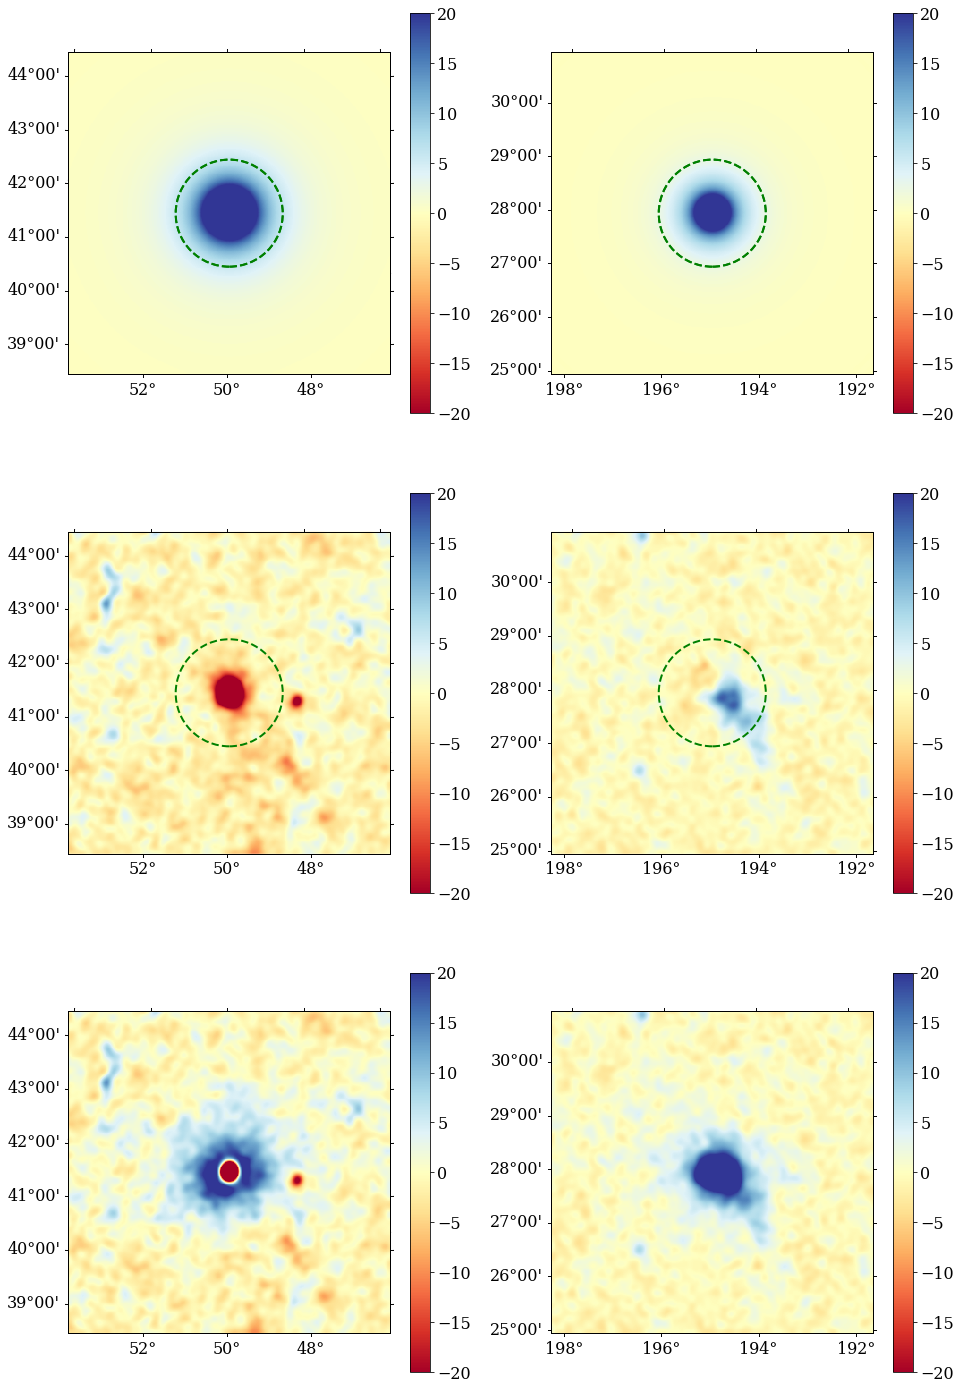

In [59]:
rad_show = 1.0

fig = plt.figure(1, figsize=(15, 25))

# Model 1
ax1 = plt.subplot(321, projection=WCS(h1))
plt.imshow(1e6*y1, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster1.coord.ra.value, cluster1.coord.dec.value),
                                        2*rad_show/np.cos(cluster1.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax1.get_transform('fk5'))
ax1.add_patch(circle_500)
plt.colorbar()

# Model 2
ax2 = plt.subplot(322, projection=WCS(h2))
plt.imshow(1e6*y2, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster2.coord.ra.value, cluster2.coord.dec.value),
                                        2*rad_show/np.cos(cluster2.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax2.get_transform('fk5'))
ax2.add_patch(circle_500)
plt.colorbar()

# Model 1 - Perseus
ax3 = plt.subplot(323, projection=WCS(h1))
plt.imshow(1e6*(ymap1-y1.to_value('adu')), vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster1.coord.ra.value, cluster1.coord.dec.value),
                                        2*rad_show/np.cos(cluster1.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax3.get_transform('fk5'))
ax3.add_patch(circle_500)
plt.colorbar()

# Model 2 - Coma
ax4 = plt.subplot(324, projection=WCS(h2))
plt.imshow(1e6*(ymap2-y2.to_value('adu')), vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster2.coord.ra.value, cluster2.coord.dec.value),
                                        2*rad_show/np.cos(cluster2.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax4.get_transform('fk5'))
ax4.add_patch(circle_500)
plt.colorbar()

# Perseus
ax5 = plt.subplot(325, projection=WCS(header1))
plt.imshow(1e6*ymap1, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((coord1.ra.value, coord1.dec.value),
                                        2*rad_show/np.cos(coord1.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax1.get_transform('fk5'))
ax1.add_patch(circle_500)
plt.colorbar()

# Coma
ax6 = plt.subplot(326, projection=WCS(header2))
plt.imshow(1e6*ymap2, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((coord2.ra.value, coord2.dec.value),
                                        2*rad_show/np.cos(coord2.dec.value*np.pi/180),2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax2.get_transform('fk5'))
ax2.add_patch(circle_500)
plt.colorbar()

In [60]:
cluster.coord.icrs.ra.rad

Getting the coordinates


0.0